# Exercise 2

ให้ทดลองปรับพารามิเตอร์ต่อไปนี้ แล้วเขียนอธิบายว่าทำอะไรเพิ่มเติม และมีการเปลี่ยนแปลงอะไรเกิดขึ้นบ้าง
1. VGG16 Model Architecture (เช่น node, layer, etc.)
2. training parameters (เช่น learning rate, optimizer, batch_size, etc.)

เพื่อให้ได้ Loss ต่ำที่สุด และ สามารถทำ Data Augment เพิ่มเติมได้หากจำเป็น
กำหนดให้ใช้ Performance metrics เป็น F1-Score ของทั้ง 2 classifications


<font size="3" color="red"><b>ในการเขียนโค้ดให้เขียนภายใน</b></font> `### START CODE HERE ###` <font size="3" color="red"><b>และ</b></font> `### END CODE HERE ###` <font size="3" color="red"><b>เท่านั้น ถ้าเขียนนอกเหนือจากกรอบนี้ตัวตรวจโค้ดจะไม่ตรวจแล้วจะไม่ได้คะแนน</b></font>



***สิ่งที่ต้องส่ง***
1. ผลการทดสอบโมเดลกับ **Test dataset**\* ที่กำหนดเป็นไฟล์ `.csv` ประกอบไปด้วย 3 คอลัมน์ ([ตัวอย่างไฟล์ csv](https://github.com/NextGen-AI-Camp/curriculum-2025/blob/main/Week%235/Transfer_Learning/sample_submission.csv))
    - คอลัมน์ที่่ 1 เป็นชื่อไฟล์รูปที่ใช้ predict ```[เช่น img1.jpg, img2.jpg ..., imgN.jpg]```
    - คอลัมน์ที่ 2 เป็นผลัพธ์การ predict จาก language classification 2 classes (0, 1) ```[โดย english คือ 0 และ thai คือ 1]```
    - คอลัมน์ที่ 3 เป็นผลัพธ์การ predict จาก number classification 10 classes (0, 1, 2, ..., 9)

2. ไฟล์ weight ของโมเดล (`.pth` หรือ `.pt`)
3. ไฟล์ source code (`.ipynb`)
4. ไฟล์ `.pdf` อธิบายการทดลองปรับพารามิเตอร์และการเปลี่ยนแปลงที่เกิดขึ้น

***กรุณาส่งไฟล์ดังนี้:***
- ไฟล์ `.csv` แยกต่างหาก
- ไฟล์ `.zip` ที่ zip ไฟล์ weight ของโมเดล (`.pth` หรือ `.pt`)
- ไฟล์ `.zip` ที่ zip ไฟล์ source code (`.ipynb`)
- ไฟล์ `.pdf` อธิบายการทดลองปรับพารามิเตอร์และการเปลี่ยนแปลงที่เกิดขึ้น

# **Transfer Learning & Multitask Learning**

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision.models as models
import torchvision.transforms as transforms

from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader,Subset,Dataset,random_split
from PIL import Image


import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import os
from sklearn.metrics import classification_report, confusion_matrix

Complete the `MultiLanguageHandwrittenDataset` class below. It should return:
- `image`: the image data
- `label`: the digit label (0-9)
- `language`: the language (Thai or English)


In [2]:
### START CODE HERE ###
class MultiLanguageHandwrittenDataset(Dataset):
    def __init__(self, root_dirs, languages, transforms=None):
        self.root_dirs = root_dirs
        self.languages = languages
        self.transform = transforms
        self.samples = []
        for root_dir, language in zip(self.root_dirs, self.languages):
            for subdir in os.scandir(root_dir):
                if subdir.is_dir():
                    label = int(subdir.name)
                    for file in os.scandir(subdir.path):
                        if file.is_file():
                            self.samples.append((file.path, label, language))
        print(self.samples)

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path, label, language = self.samples[idx]
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)



        return image, label, language
### END CODE HERE ###

use you `MultiLanguageHandwrittenDataset` here and display the first batch
<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://github.com/NextGen-AI-Camp/curriculum-2025/blob/main/Week%235/Transfer_Learning/assets/1.png?raw=true)

</details>

In [3]:
import zipfile
import os

data_zip_path = "/content/data.zip"
test_zip_path = "/content/test.zip"
extract_path = "/content/datasets"

# Create the extraction directory if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Extract data.zip
with zipfile.ZipFile(data_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Extract test.zip
with zipfile.ZipFile(test_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Both ZIP files extracted successfully!")


Both ZIP files extracted successfully!


[('/content/datasets/data/data/eng-handwritten-dataset/1/img_975.jpg', 1, 'English'), ('/content/datasets/data/data/eng-handwritten-dataset/1/img_594.jpg', 1, 'English'), ('/content/datasets/data/data/eng-handwritten-dataset/1/img_1572.jpg', 1, 'English'), ('/content/datasets/data/data/eng-handwritten-dataset/1/img_1209.jpg', 1, 'English'), ('/content/datasets/data/data/eng-handwritten-dataset/1/img_1641.jpg', 1, 'English'), ('/content/datasets/data/data/eng-handwritten-dataset/1/img_645.jpg', 1, 'English'), ('/content/datasets/data/data/eng-handwritten-dataset/1/img_1294.jpg', 1, 'English'), ('/content/datasets/data/data/eng-handwritten-dataset/1/img_1458.jpg', 1, 'English'), ('/content/datasets/data/data/eng-handwritten-dataset/1/img_380.jpg', 1, 'English'), ('/content/datasets/data/data/eng-handwritten-dataset/1/img_777.jpg', 1, 'English'), ('/content/datasets/data/data/eng-handwritten-dataset/1/img_1171.jpg', 1, 'English'), ('/content/datasets/data/data/eng-handwritten-dataset/1/im

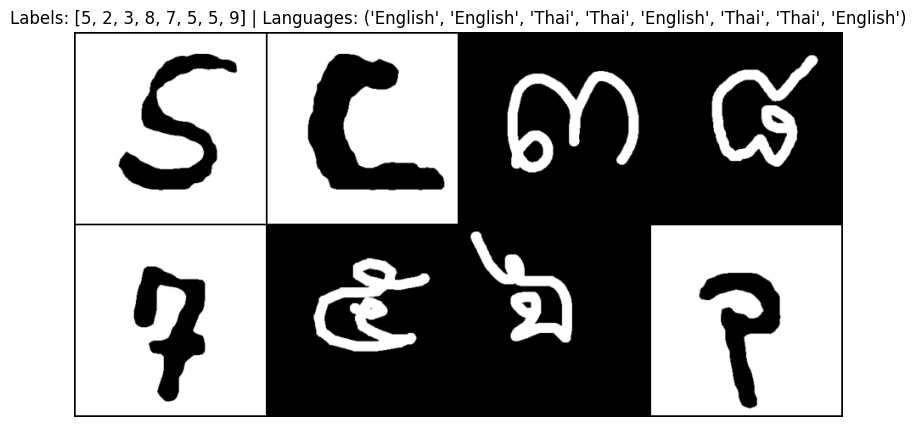

In [4]:
### START CODE HERE ##


root_dirs = ['/content/datasets/data/data/eng-handwritten-dataset', '/content/datasets/data/data/thai-handwritten-dataset']
languages = ['English', 'Thai']
# E:\CE-AI-Nextgen\Transfer-Learning\data\data\data\data\eng-handwritten-dataset
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

dataset = MultiLanguageHandwrittenDataset(root_dirs=root_dirs, languages=languages, transforms=transform_train)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)
from torch.utils.data import random_split, DataLoader

# แบ่ง dataset: 80% train / 20% val
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# สร้าง DataLoader

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=32, num_workers=0)


import matplotlib.pyplot as plt
import torchvision

images, labels, languages = next(iter(dataloader))

# สร้าง grid ของภาพ
grid_img = torchvision.utils.make_grid(images[:8], nrow=4)
plt.figure(figsize=(10, 5))
plt.imshow(grid_img.permute(1, 2, 0))
plt.title(f"Labels: {labels[:8].tolist()} | Languages: {languages[:8]}")
plt.axis('off')
plt.show()
### END CODE HERE ###


## Transfer learning

Complete the `customVGG16` class below, which can create a pretrained VGG16 model and customize the number of fully connected (FC) layers. It also allows adding new convolutional layers and unfreezing pretrained layers based on their index.

In [5]:
### START CODE HERE ###
class customVGG16(nn.Module):
    def __init__(self,add_feat_dims=None,h_dims=None,num_classes=10,input_size=(1,28,28),trainable_layers_idx=None):
        super(customVGG16, self).__init__()
        self.vgg16 = models.vgg16(pretrained=True)

        for param in self.vgg16.features[:].parameters():
            param.requires_grad = False # Freeze all features

        for param in self.vgg16.classifier.parameters():
            param.requires_grad = True

        if trainable_layers_idx is not None:
            for idx in trainable_layers_idx:
                for param in self.vgg16.features[idx].parameters():
                    param.requires_grad = True

        if add_feat_dims:
            new_layers = []
            # เริ่มด้วย in_channels = output channels ของ features สุดท้ายเดิม
            # หา out_channels ของ Conv2d สุดท้ายใน features
            in_ch = [m.out_channels for m in self.vgg16.features if isinstance(m, nn.Conv2d)][-1]
            for out_ch in add_feat_dims:
                new_layers.append(nn.Conv2d(in_ch, out_ch, kernel_size=3, padding=1))
                new_layers.append(nn.ReLU(inplace=True))
                new_layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
                in_ch = out_ch
            # เอา features เดิมมาต่อกับ new_layers ที่เราเตรียม
            self.vgg16.features = nn.Sequential(*list(self.vgg16.features), *new_layers)

        # 5) สร้าง Custom Classifier (FC layers) ใหม่
        #   – หา input dimension ของ FC ด้วย dummy tensor
        fc_in_dim = self._get_input_size_fc(input_size)

        classifier_layers = []
        if h_dims:
            for h in h_dims:
                classifier_layers.append(nn.Linear(fc_in_dim, h))
                classifier_layers.append(nn.ReLU(inplace=True))
                classifier_layers.append(nn.Dropout(0.5))
                fc_in_dim = h
        # Output layer สุดท้าย
        classifier_layers.append(nn.Linear(fc_in_dim, num_classes))

        # เปลี่ยน classifier ของ vgg16 ให้เป็น sequential ใหม่
        self.vgg16.classifier = nn.Sequential(*classifier_layers)

    def _get_input_size_fc(self, input_shape):
        with torch.no_grad():
            x = torch.zeros(1, *input_shape)
            x = self.vgg16.features(x)
            x = self.vgg16.avgpool(x)
            x = torch.flatten(x[0])
            return x.size(0)

    def forward(self, x):
        x = self.vgg16.features(x)
        x = self.vgg16.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.vgg16.classifier(x)
        return x


### END CODE HERE ###


In [6]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
trainable_layers_idx = [-1,-2,-3,-4,-5]
model = customVGG16(
    add_feat_dims=[512],
    h_dims=[512,256,256],
    input_size=(3,224,224),
    trainable_layers_idx=trainable_layers_idx).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:03<00:00, 160MB/s]


Example usage
```
trainable_layers_idx = [-1,-2,-3,-4,-5]
model = customVGG16(add_feat_dims=[512],h_dims=[512,256,256],input_size=(3,224,224),trainable_layers_idx=trainable_layers_idx)

```


Complete the `train` function below, which logs Loss/train, Accuracy/train, Loss/test, and Accuracy/test to [TensorBoard](https://pytorch.org/docs/stable/tensorboard.html).Then, complete the evaluate_task function, which prints the classification report and plots the confusion matrix

In [7]:
### START CODE HERE ###
def train(model,opt,loss_fn,train_loader,val_loader,epochs=10,writer=None,checkpoint_path=None,device='cpu',task='digit'):
    model = model.to(device)
    best_acc = 0.0
    print(" Starting training...")

    for epoch in range(epochs):
        print(f"\n Epoch {epoch+1}/{epochs}")
        model.train()
        train_loss, train_correct, total_train = 0.0, 0, 0

        for batch_idx, (X, y, _) in enumerate(train_loader):
            print(f" [Train] Batch {batch_idx+1} | Shape: {X.shape}, Labels: {y.shape}")
            X, y = X.to(device), y.to(device)

            opt.zero_grad()
            preds = model(X)  # ✅ Forward pass
            print(f" Forward pass done")

            loss = loss_fn(preds, y)  # ✅ Loss calculation
            print(f" Loss: {loss.item():.4f}")

            loss.backward()
            opt.step()

            train_loss += loss.item() * X.size(0)
            _, predicted = torch.max(preds, 1)
            train_correct += (predicted == y).sum().item()
            total_train += y.size(0)

        train_loss /= total_train
        train_acc = train_correct / total_train
        print(f" Training Epoch Done | Loss: {train_loss:.4f}, Acc: {train_acc:.4f}")

        # Validation
        model.eval()
        val_loss, val_correct, total_val = 0.0, 0, 0
        with torch.no_grad():
            for batch_idx, (X, y) in enumerate(val_loader):
                print(f" [Val] Batch {batch_idx+1}")
                X, y = X.to(device), y.to(device)
                preds = model(X)
                loss = loss_fn(preds, y)

                val_loss += loss.item() * X.size(0)
                _, predicted = torch.max(preds, 1)
                val_correct += (predicted == y).sum().item()
                total_val += y.size(0)

        val_loss /= total_val
        val_acc = val_correct / total_val
        print(f" Epoch {epoch+1}/{epochs} Completed | Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

        if writer:
            writer.add_scalar(f'Loss/train/{task}', train_loss, epoch)
            writer.add_scalar(f'Accuracy/train/{task}', train_acc, epoch)
            writer.add_scalar(f'Loss/test/{task}', val_loss, epoch)
            writer.add_scalar(f'Accuracy/test/{task}', val_acc, epoch)

        if checkpoint_path and val_acc > best_acc:
            best_acc = val_acc
            torch.save(model.state_dict(), checkpoint_path)
            print(f" Model saved to {checkpoint_path} (val_acc={val_acc:.4f})")

### END CODE HERE ###


In [8]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter(log_dir='runs/experiment_1')  # You can change the log directory

train(
    model=model,
    opt=optimizer,
    loss_fn=loss_fn,
    train_loader=train_loader,
    val_loader=val_loader,
    epochs=10,
    writer=writer,
    checkpoint_path="best_model.pth",
    device=device,
    task='language'
)


🚀 Starting training...

📘 Epoch 1/10
🔄 [Train] Batch 1 | Shape: torch.Size([32, 3, 224, 224]), Labels: torch.Size([32])
✅ Forward pass done
📉 Loss: 2.2867
🔄 [Train] Batch 2 | Shape: torch.Size([32, 3, 224, 224]), Labels: torch.Size([32])
✅ Forward pass done
📉 Loss: 2.3013
🔄 [Train] Batch 3 | Shape: torch.Size([32, 3, 224, 224]), Labels: torch.Size([32])
✅ Forward pass done
📉 Loss: 2.3073
🔄 [Train] Batch 4 | Shape: torch.Size([32, 3, 224, 224]), Labels: torch.Size([32])
✅ Forward pass done
📉 Loss: 2.3089
🔄 [Train] Batch 5 | Shape: torch.Size([32, 3, 224, 224]), Labels: torch.Size([32])
✅ Forward pass done
📉 Loss: 2.3939
🔄 [Train] Batch 6 | Shape: torch.Size([32, 3, 224, 224]), Labels: torch.Size([32])
✅ Forward pass done
📉 Loss: 2.3315
🔄 [Train] Batch 7 | Shape: torch.Size([32, 3, 224, 224]), Labels: torch.Size([32])
✅ Forward pass done
📉 Loss: 2.3171
🔄 [Train] Batch 8 | Shape: torch.Size([32, 3, 224, 224]), Labels: torch.Size([32])
✅ Forward pass done
📉 Loss: 2.2932
🔄 [Train] Batch 9 |

ValueError: too many values to unpack (expected 2)

### Transfer learning for Digit classification task
Declare the `customVGG16` model with custom layers of your choice. Then, split the dataset into training, validation, and test sets, and proceed to train the model.

In [ ]:
### START CODE HERE ###
model1 = customVGG16(None)

train_dataset, val_dataset, test_dataset = None

writer = None
opt = None
loss_fn = None
train(None)
### END CODE HERE ###


use `evaluate_task` to evlauate you model1 here.
<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

```
Digit - Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.92      0.84        26
           1       0.75      0.94      0.83        32
           2       0.66      0.54      0.59        39
           3       0.76      0.54      0.63        35
           4       0.68      0.53      0.60        47
           5       0.52      0.42      0.47        33
           6       0.59      0.88      0.71        33
           7       0.46      0.59      0.52        27
           8       0.70      0.65      0.67        43
           9       0.85      0.83      0.84        35

    accuracy                           0.67       350
   macro avg       0.67      0.68      0.67       350
weighted avg       0.68      0.67      0.67       350

```

![image.png](https://github.com/NextGen-AI-Camp/curriculum-2025/blob/main/Week%235/Transfer_Learning/assets/2.png?raw=true)

</details>

In [ ]:
### START CODE HERE ###

### END CODE HERE ###


### Transfer learning for Language classification task
Declare a NEW `customVGG16` model with custom layers of your choice.

In [ ]:
### START CODE HERE ###
model2 = customVGG16(None)

train_dataset, val_dataset, test_dataset = None

writer = None
opt = None
loss_fn = None
train(None)
### END CODE HERE ###


use `evaluate_task` to evlauate you model2 here.
<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

```
Language - Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       175
           1       0.99      0.93      0.96       175

    accuracy                           0.96       350
   macro avg       0.96      0.96      0.96       350
weighted avg       0.96      0.96      0.96       350

```

![image.png](https://github.com/NextGen-AI-Camp/curriculum-2025/blob/main/Week%235/Transfer_Learning/assets/3.png?raw=true)

</details>

In [ ]:
### START CODE HERE ###

### END CODE HERE ###

---

## Multitask learning

Complete the `customVGG16_multitask` class below, which can create a pretrained VGG16 model and customize the number of fully connected (FC) layers. It also allows adding new convolutional layers and unfreezing pretrained layers based on their index. Additionally, it allows branching the model into two heads for multitask learning, where one head handles digit classification, and the other handles language classification

In [ ]:
class customVGG16_multitask(nn.Module):
    def __init__(self,add_feat_dims=None,h_dims=None,input_size=(1,28,28),trainable_layers_idx=None):
        super(customVGG16_multitask, self).__init__()
        pass

    def _get_input_size_fc(self, input_shape):
        with torch.no_grad():
            x = torch.zeros(1, *input_shape)
            x = self.vgg16.features(x)
            x = self.vgg16.avgpool(x)
            x = torch.flatten(x[0])
            return x.size(0)

    def forward(self, x):

        out1 = self.vgg16.digit(x)
        out2 = self.vgg16.lang(x)

        return out1,out2


Complete the `train_multi` function below, which train multitask model and  logs Loss/train, Accuracy/train, Loss/test, and Accuracy/test to [TensorBoard](https://pytorch.org/docs/stable/tensorboard.html).

In [ ]:
def train_multi(model, opt, loss_fn, train_loader, val_loader, epochs=10, writer=None, checkpoint_path=None, device='cpu'):
    pass



In [ ]:
### START CODE HERE ###
model = customVGG16(None)

train_dataset, val_dataset, test_dataset = None

writer = None
opt = None
loss_fn = None
train(None)
### END CODE HERE ###


use `evaluate_task` to evlauate you model here.
<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

```
Digit - Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        35
           1       0.81      0.91      0.85        32
           2       0.76      0.55      0.64        40
           3       0.53      0.66      0.58        32
           4       0.54      0.29      0.38        24
           5       0.51      0.57      0.54        37
           6       0.68      0.72      0.70        29
           7       0.60      0.71      0.65        34
           8       0.62      0.71      0.66        48
           9       0.68      0.49      0.57        39

    accuracy                           0.65       350
   macro avg       0.66      0.65      0.64       350
weighted avg       0.66      0.65      0.65       350

```

![image.png](https://github.com/NextGen-AI-Camp/curriculum-2025/blob/main/Week%235/Transfer_Learning/assets/4.png?raw=true)

```
Language - Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       172
           1       0.98      0.98      0.98       178

    accuracy                           0.98       350
   macro avg       0.98      0.98      0.98       350
weighted avg       0.98      0.98      0.98       350
```

![image-2.png](https://github.com/NextGen-AI-Camp/curriculum-2025/blob/main/Week%235/Transfer_Learning/assets/5.png?raw=true)

</details>

In [ ]:
### START CODE HERE ###

### END CODE HERE ###


---
# Question
1. If you build two separate models, one for each task with a different classification problem,
how does the overall model size of two separate models compared to a single model with shared layers and two classifiers
at the end?

2. In what scenarios might a single model with two classifiers outperform two separate models in terms of generalization? Is there a risk of one task negatively affecting the other?

3. How can weighted loss functions be applied in a single model with two classifiers to balance the performance of both tasks?